C:\Users\JasonGreich\AppData\Local\Temp\ipykernel_9868\973439123.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Attack_Type", data=data, order=data["Attack_Type"].value_counts().index, palette="viridis")


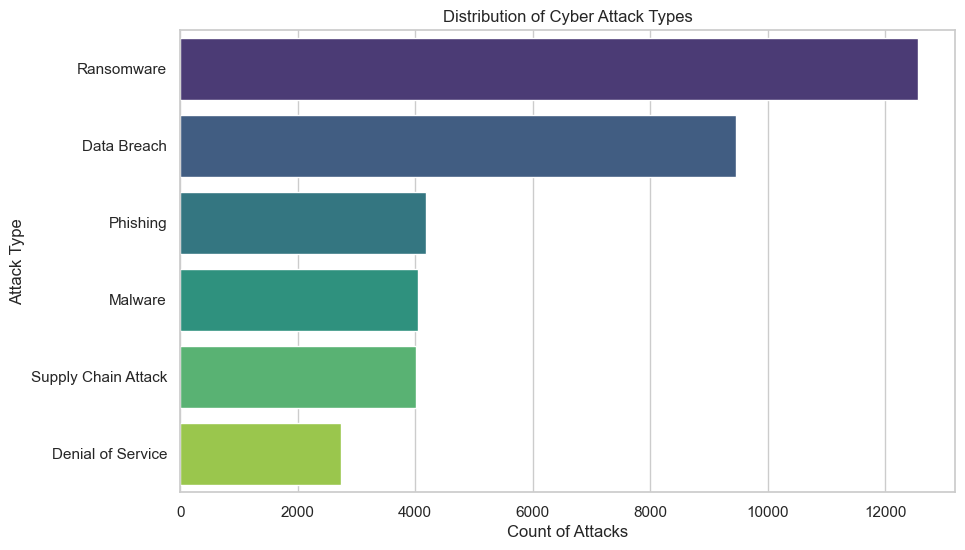

In [14]:
# Cell 1: Distribution of attack types
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('../Data Warehousing ETL/Transformed_Data/companies_cyber_attacks_europe.csv')

# Set plot style
sns.set(style="whitegrid")

# 1. Distribution of attack types
plt.figure(figsize=(10, 6))
sns.countplot(y="Attack_Type", data=data, order=data["Attack_Type"].value_counts().index, palette="viridis")
plt.title("Distribution of Cyber Attack Types")
plt.xlabel("Count of Attacks")
plt.ylabel("Attack Type")
plt.show()


C:\Users\JasonGreich\AppData\Local\Temp\ipykernel_9868\914953799.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Country", data=data, order=data["Country"].value_counts().index[:10], palette="inferno")


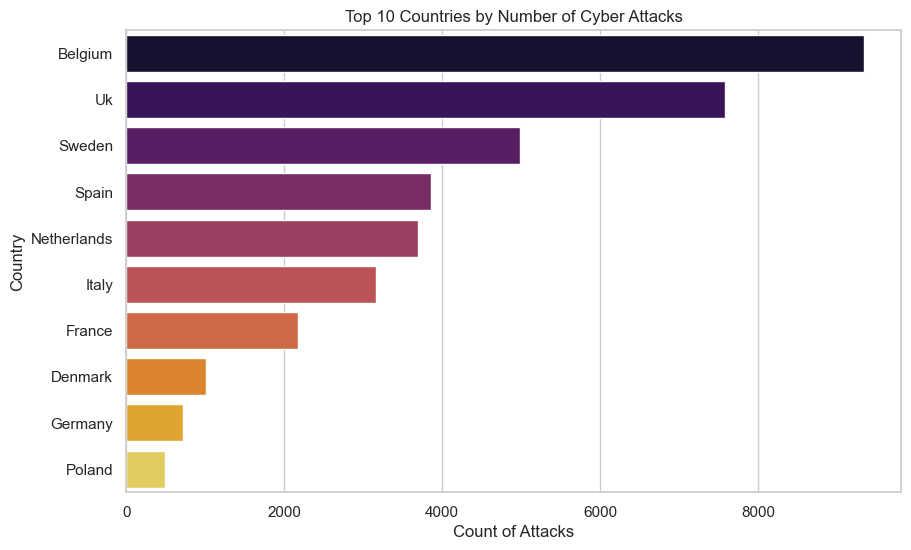

In [15]:
# Cell 2: Distribution of incidents by country
plt.figure(figsize=(10, 6))
sns.countplot(y="Country", data=data, order=data["Country"].value_counts().index[:10], palette="inferno")
plt.title("Top 10 Countries by Number of Cyber Attacks")
plt.xlabel("Count of Attacks")
plt.ylabel("Country")
plt.show()


C:\Users\JasonGreich\AppData\Local\Temp\ipykernel_9868\1349290001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Year", data=data, palette="coolwarm")


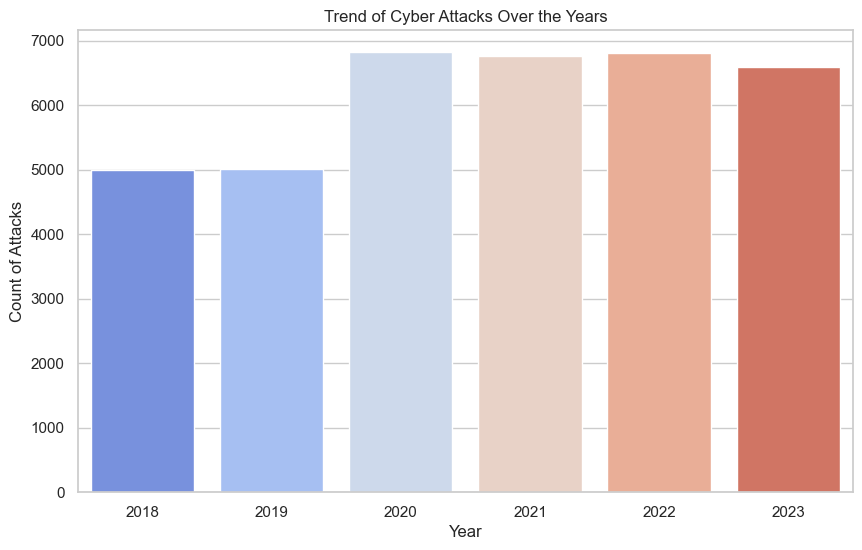

In [16]:
# Cell 3: Trend of cyber attacks over the years
plt.figure(figsize=(10, 6))
sns.countplot(x="Year", data=data, palette="coolwarm")
plt.title("Trend of Cyber Attacks Over the Years")
plt.xlabel("Year")
plt.ylabel("Count of Attacks")
plt.show()


In [18]:
# Cell 5: Descriptive statistics for numeric columns
data.describe()


,Incident_ID,Breach_Size,Financial_Loss,Mitigation_Time,Year,Month,Day
count,37000.000000,3.700000e+04,3.700000e+04,37000.000000,37000.000000,37000.000000,37000.000000
mean,18500.500000,4.972400e+06,2.540877e+06,32.530811,2020.681000,6.548568,15.696541
std,10681.124317,2.638589e+06,1.411672e+06,16.146655,1.654189,3.432722,8.802976
min,1.000000,1.007500e+04,1.002547e+05,5.000000,2018.000000,1.000000,1.000000
25%,9250.750000,2.972572e+06,1.319759e+06,19.000000,2019.000000,4.000000,8.000000
50%,18500.500000,4.950575e+06,2.534882e+06,32.000000,2021.000000,7.000000,16.000000
75%,27750.250000,6.966304e+06,3.763184e+06,46.000000,2022.000000,10.000000,23.000000
max,37000.000000,9.999246e+06,4.999991e+06,60.000000,2023.000000,12.000000,31.000000


In [19]:
# Cell 1: Attacks per year
attacks_per_year = data.groupby('Year').size()

print("Attacks Per Year:")
print(attacks_per_year)


Attacks Per Year:
Year
2018    4995
2019    5005
2020    6822
2021    6762
2022    6818
2023    6598
dtype: int64


In [20]:
# Cell 2: Attacks per country
attacks_per_country = data.groupby('Country').size()

print("Attacks Per Country:")
print(attacks_per_country)


Attacks Per Country:
Country
Belgium        9346
Denmark        1003
France         2178
Germany         713
Italy          3156
Netherlands    3693
Poland          485
Spain          3858
Sweden         4982
Uk             7586
dtype: int64


In [21]:
# Cell 3: Attacks per industry
attacks_per_industry = data.groupby('Industry').size()

print("Attacks Per Industry:")
print(attacks_per_industry)


Attacks Per Industry:
Industry
Energy                 360
Finance               1566
Healthcare            9539
Manufacturing         9756
Retail                7558
Tech                  4339
Telecommunications    3882
dtype: int64


In [22]:
# Cell 4: Attacks per attack type
attacks_per_attack_type = data.groupby('Attack_Type').size()

print("Attacks Per Attack Type:")
print(attacks_per_attack_type)


Attacks Per Attack Type:
Attack_Type
Data Breach             9459
Denial of Service       2735
Malware                 4040
Phishing                4186
Ransomware             12564
Supply Chain Attack     4016
dtype: int64


In [23]:
# Cell 5: Financial loss per year
financial_loss_per_year = data.groupby('Year')['Financial_Loss'].sum()

print("Financial Loss Per Year:")
print(financial_loss_per_year)


Financial Loss Per Year:
Year
2018    1.272341e+10
2019    1.278693e+10
2020    1.755918e+10
2021    1.716163e+10
2022    1.710718e+10
2023    1.667411e+10
Name: Financial_Loss, dtype: float64


In [24]:
# Cell 6: Average breach size per industry
avg_breach_size_per_industry = data.groupby('Industry')['Breach_Size'].mean()

print("Average Breach Size Per Industry:")
print(avg_breach_size_per_industry)


Average Breach Size Per Industry:
Industry
Energy                4.809400e+06
Finance               4.915534e+06
Healthcare            5.005318e+06
Manufacturing         4.978472e+06
Retail                4.988061e+06
Tech                  4.944572e+06
Telecommunications    4.914921e+06
Name: Breach_Size, dtype: float64


In [25]:
# Cell 7: Average mitigation time per attack type
avg_mitigation_time_per_attack = data.groupby('Attack_Type')['Mitigation_Time'].mean()

print("Average Mitigation Time Per Attack Type:")
print(avg_mitigation_time_per_attack)


Average Mitigation Time Per Attack Type:
Attack_Type
Data Breach            32.533037
Denial of Service      32.541499
Malware                32.406683
Phishing               32.498806
Ransomware             32.629895
Supply Chain Attack    32.366534
Name: Mitigation_Time, dtype: float64


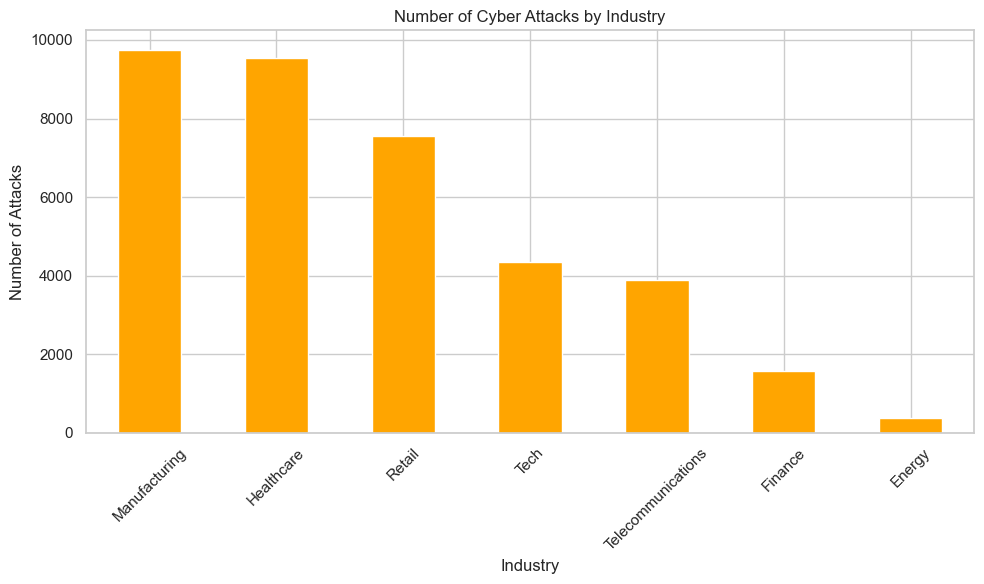

In [28]:
# Cell 3: Number of attacks per industry
plt.figure(figsize=(10, 6))
attacks_per_industry.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Number of Cyber Attacks by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


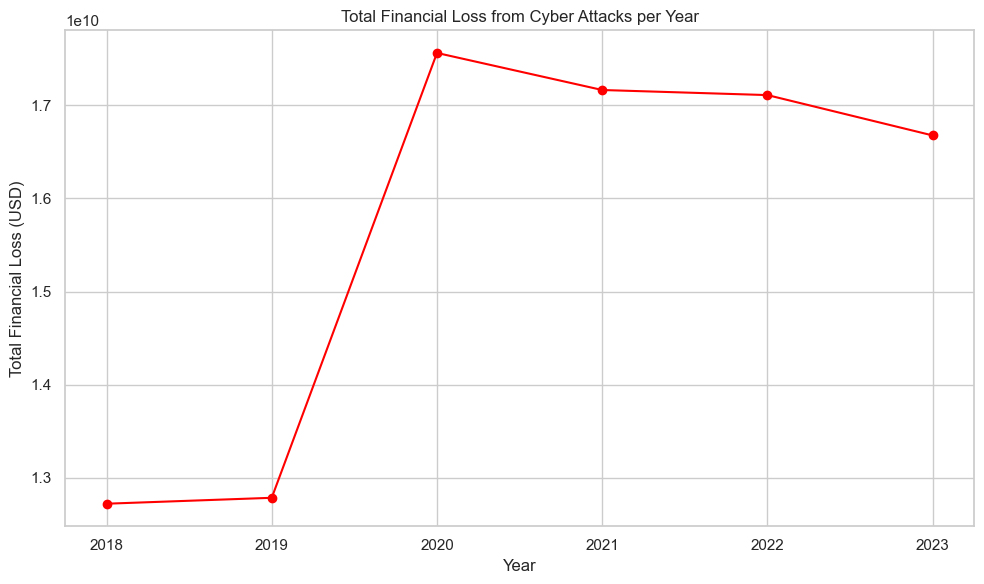

In [29]:
# Cell 4: Financial losses per year
plt.figure(figsize=(10, 6))
financial_loss_per_year.plot(kind='line', marker='o', color='red')
plt.title('Total Financial Loss from Cyber Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Total Financial Loss (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


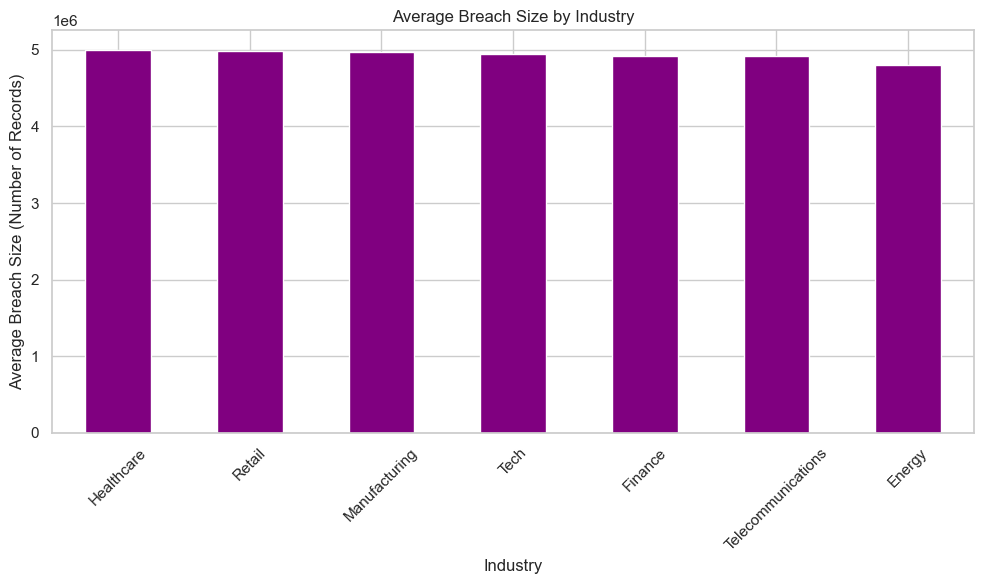

In [30]:
# Cell 5: Average breach size per industry
plt.figure(figsize=(10, 6))
avg_breach_size_per_industry.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Average Breach Size by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Breach Size (Number of Records)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


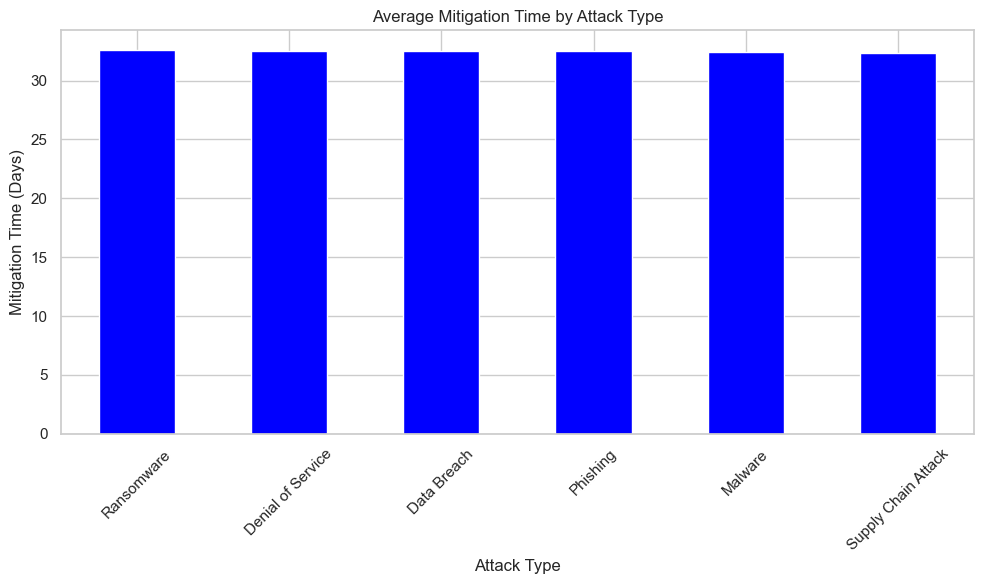

In [31]:
# Cell 6: Average mitigation time per attack type
plt.figure(figsize=(10, 6))
avg_mitigation_time_per_attack.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Average Mitigation Time by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Mitigation Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

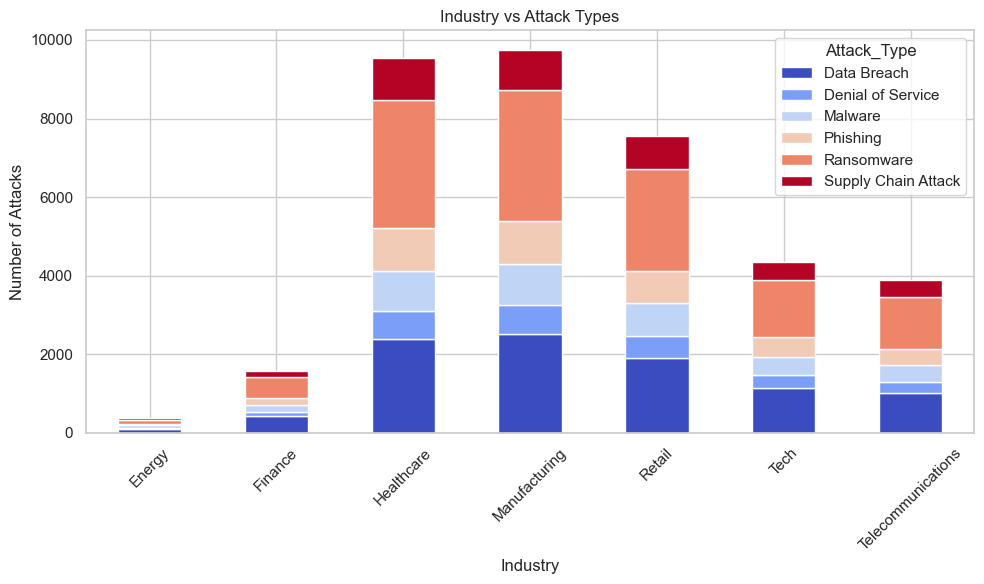

In [34]:
# Cell 2: Stacked bar plot for industries vs attack types
industry_vs_attack_type = data.groupby(['Industry', 'Attack_Type']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
industry_vs_attack_type.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Industry vs Attack Types')
plt.xlabel('Industry')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

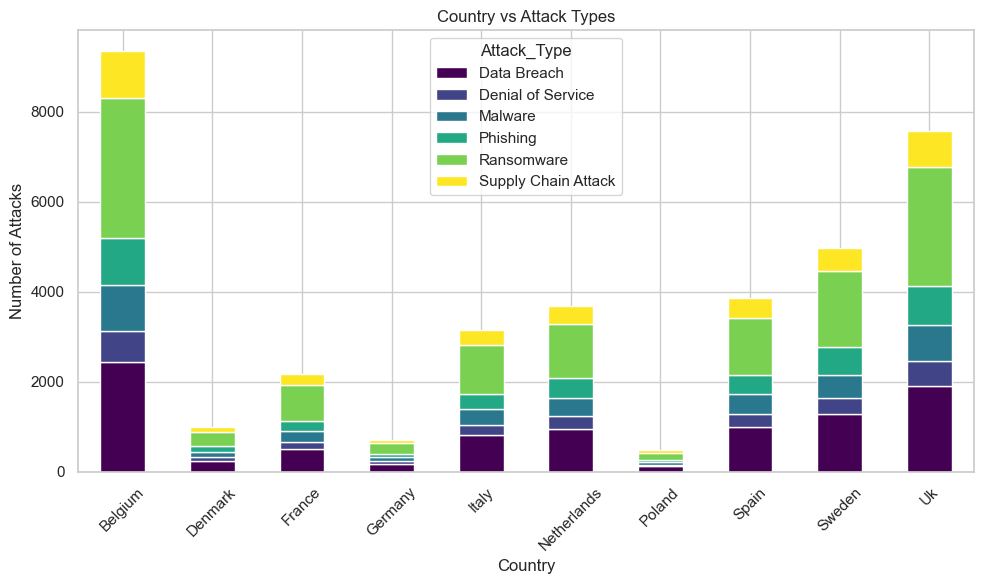

In [36]:
country_vs_attack_type = data.groupby(['Country', 'Attack_Type']).size().unstack().fillna(0)
# Cell 3: Stacked bar plot for countries vs attack types
plt.figure(figsize=(10, 6))
country_vs_attack_type.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Country vs Attack Types')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


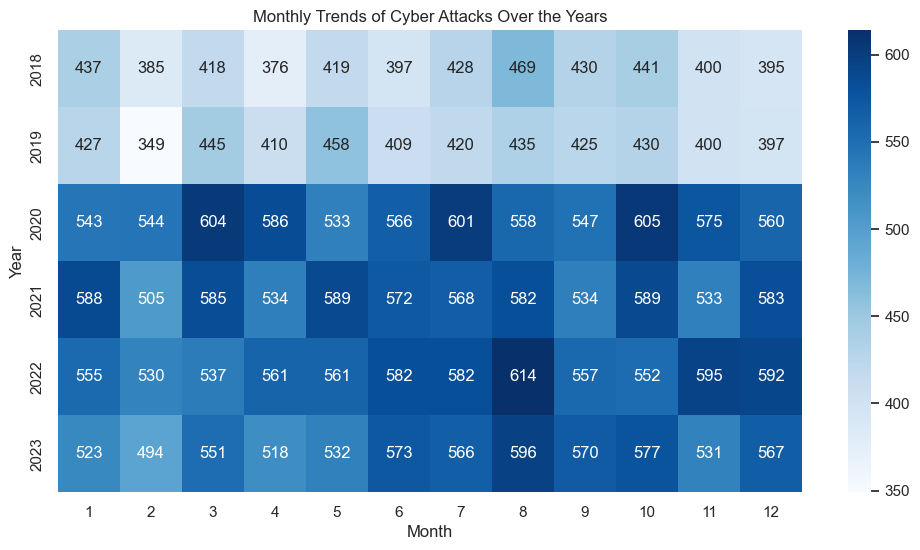

In [37]:
# Cell 1: Time Series Analysis - Monthly trends of cyber attacks
attacks_per_month = data.groupby(['Year', 'Month']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(attacks_per_month, cmap='Blues', annot=True, fmt="d")
plt.title("Monthly Trends of Cyber Attacks Over the Years")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


C:\Users\JasonGreich\AppData\Local\Temp\ipykernel_9868\4252414398.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity', data=data, palette='muted')


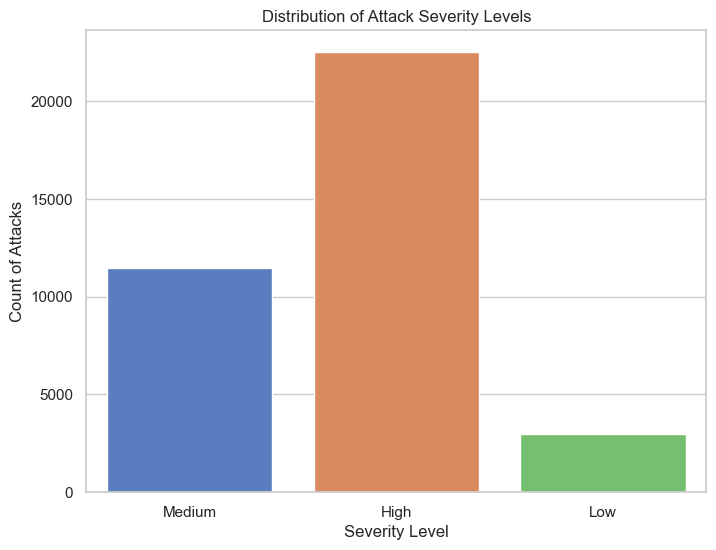

In [38]:
# Cell 2: Severity distribution based on financial loss
def severity_level(row):
    if row['Financial_Loss'] < 500000:
        return 'Low'
    elif 500000 <= row['Financial_Loss'] < 2000000:
        return 'Medium'
    else:
        return 'High'

data['Severity'] = data.apply(severity_level, axis=1)

plt.figure(figsize=(8, 6))
sns.countplot(x='Severity', data=data, palette='muted')
plt.title("Distribution of Attack Severity Levels")
plt.xlabel("Severity Level")
plt.ylabel("Count of Attacks")
plt.show()


<Figure size 1200x800 with 0 Axes>

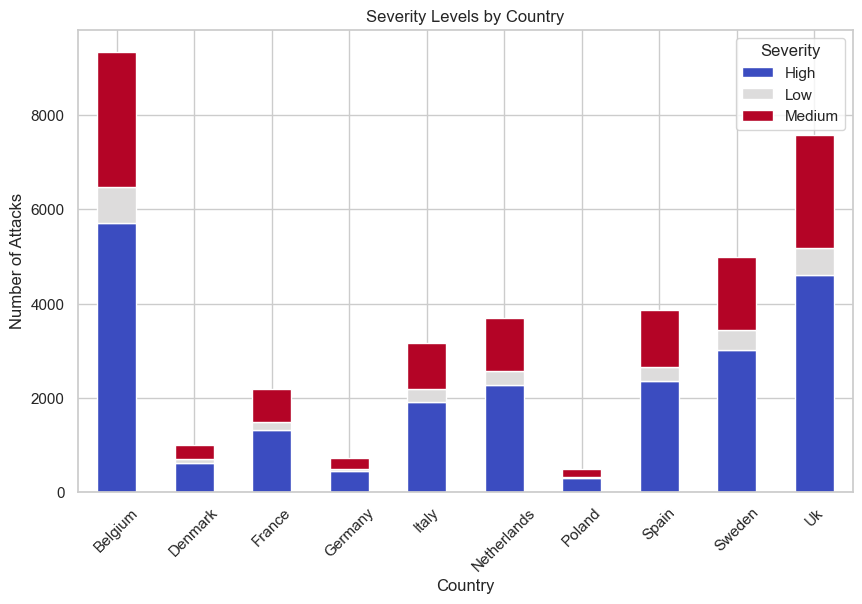

In [41]:
# Cell 5: Severity levels by country
severity_by_country = data.groupby(['Country', 'Severity']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
severity_by_country.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Severity Levels by Country')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x800 with 0 Axes>

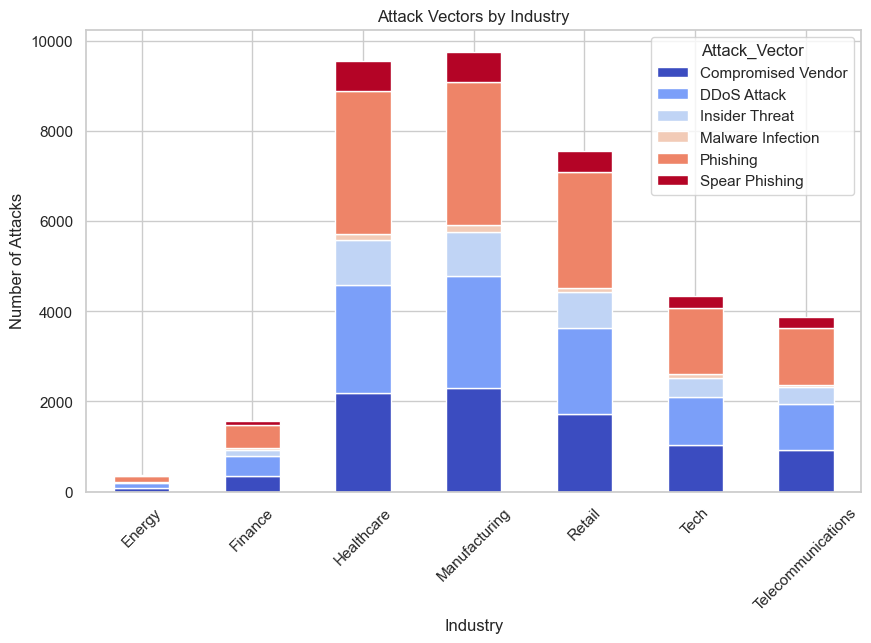

In [42]:
# Cell 1: Attack Vectors by Industry
industry_vs_attack_vector = data.groupby(['Industry', 'Attack_Vector']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
industry_vs_attack_vector.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Attack Vectors by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()


C:\Users\JasonGreich\AppData\Local\Temp\ipykernel_9868\2521992452.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Industry', y='Financial_Loss', data=data, palette='muted')


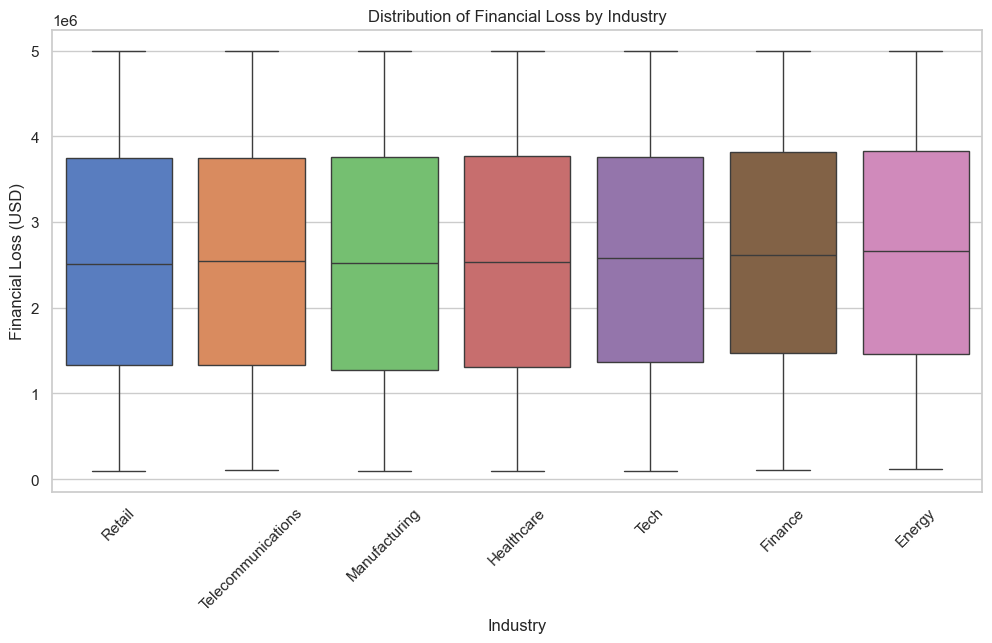

In [43]:
# Cell 2: Financial Loss by Industry
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Financial_Loss', data=data, palette='muted')
plt.title("Distribution of Financial Loss by Industry")
plt.xlabel("Industry")
plt.ylabel("Financial Loss (USD)")
plt.xticks(rotation=45)
plt.show()


C:\Users\JasonGreich\AppData\Local\Temp\ipykernel_9868\4217901396.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attack_Vector', y='Breach_Size', data=data, palette='Set3')


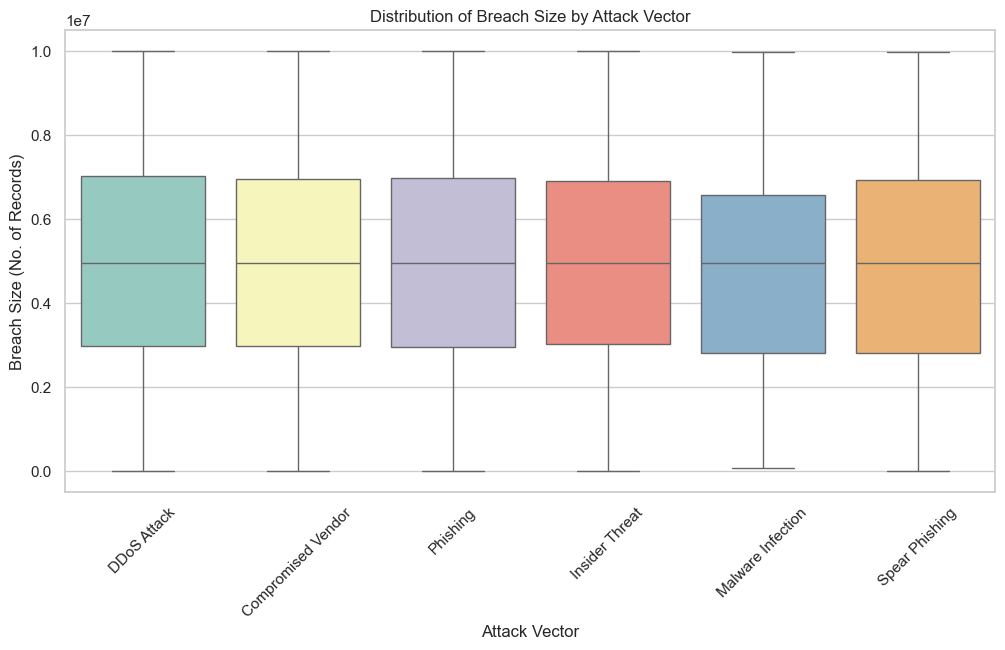

In [44]:
# Cell 3: Breach Size by Attack Vector
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attack_Vector', y='Breach_Size', data=data, palette='Set3')
plt.title("Distribution of Breach Size by Attack Vector")
plt.xlabel("Attack Vector")
plt.ylabel("Breach Size (No. of Records)")
plt.xticks(rotation=45)
plt.show()


C:\Users\JasonGreich\AppData\Local\Temp\ipykernel_9868\2639978104.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Industry', y='Mitigation_Time', data=data, palette='coolwarm')


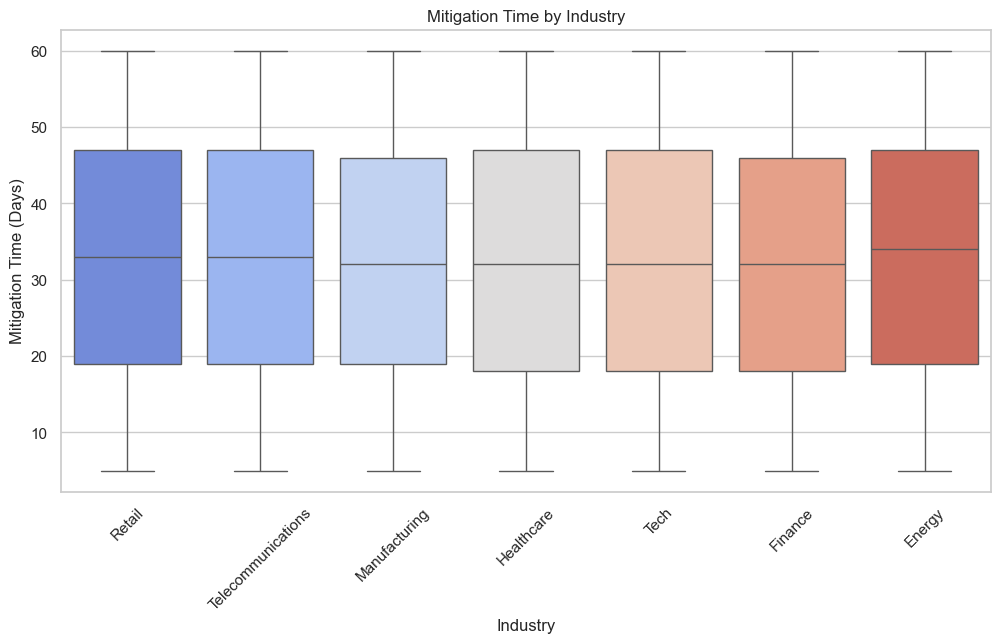

In [45]:
# Cell 4: Mitigation Time by Industry
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Mitigation_Time', data=data, palette='coolwarm')
plt.title("Mitigation Time by Industry")
plt.xlabel("Industry")
plt.ylabel("Mitigation Time (Days)")
plt.xticks(rotation=45)
plt.show()


C:\Users\JasonGreich\AppData\Local\Temp\ipykernel_9868\3081156792.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attack_Vector', y='Mitigation_Time', data=data, palette='magma')


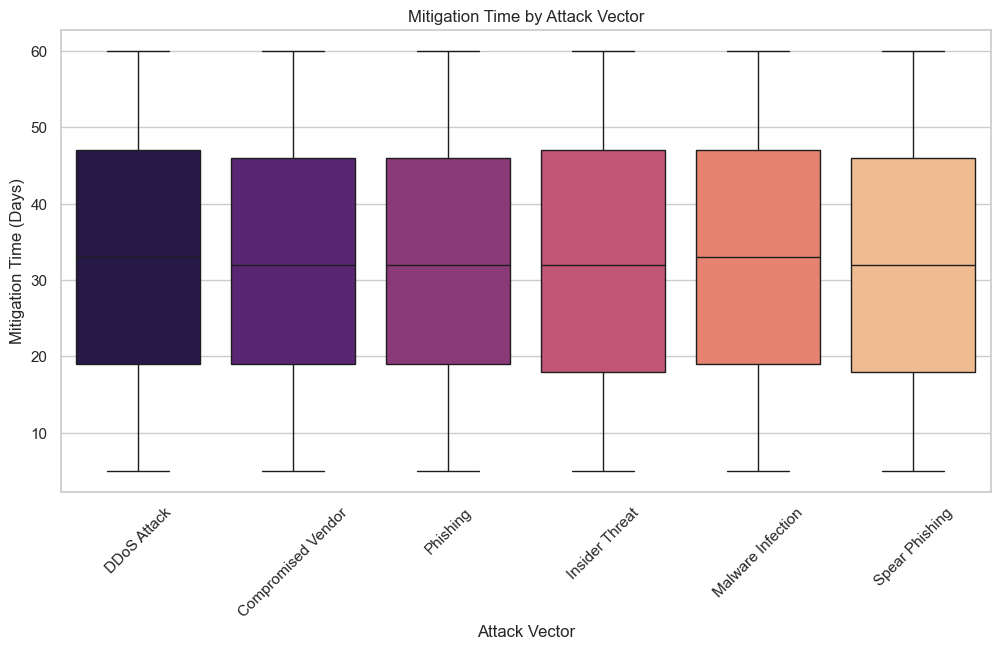

In [46]:
# Cell 5: Mitigation Time by Attack Vector
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attack_Vector', y='Mitigation_Time', data=data, palette='magma')
plt.title("Mitigation Time by Attack Vector")
plt.xlabel("Attack Vector")
plt.ylabel("Mitigation Time (Days)")
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x800 with 0 Axes>

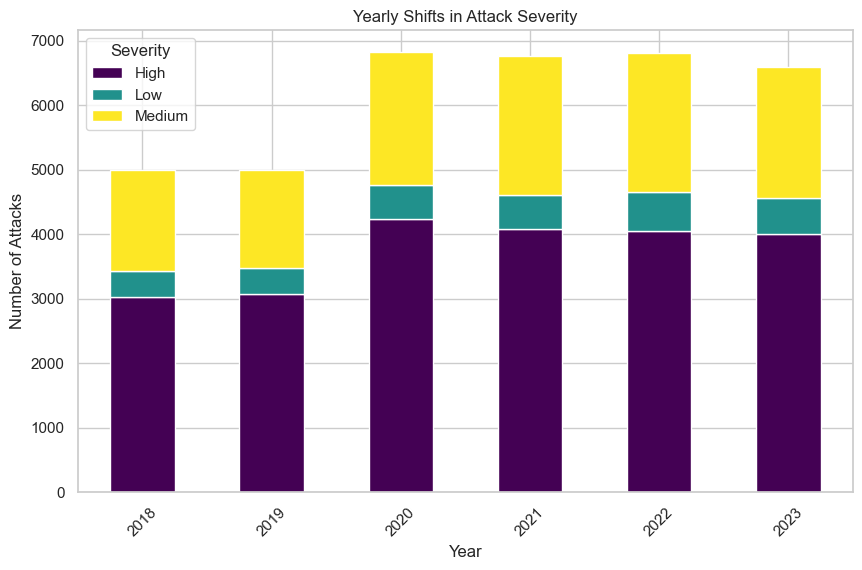

In [47]:
# Cell 6: Yearly Shifts in Attack Severity
data['Severity'] = data.apply(severity_level, axis=1)
data['Year'] = pd.to_datetime(data['Date_of_Incident']).dt.year
severity_year = data.groupby(['Year', 'Severity']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
severity_year.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Yearly Shifts in Attack Severity")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)
plt.show()


C:\Users\JasonGreich\AppData\Local\Temp\ipykernel_9868\3372332910.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Industry', y='Breach_Size', data=data, palette='Purples')


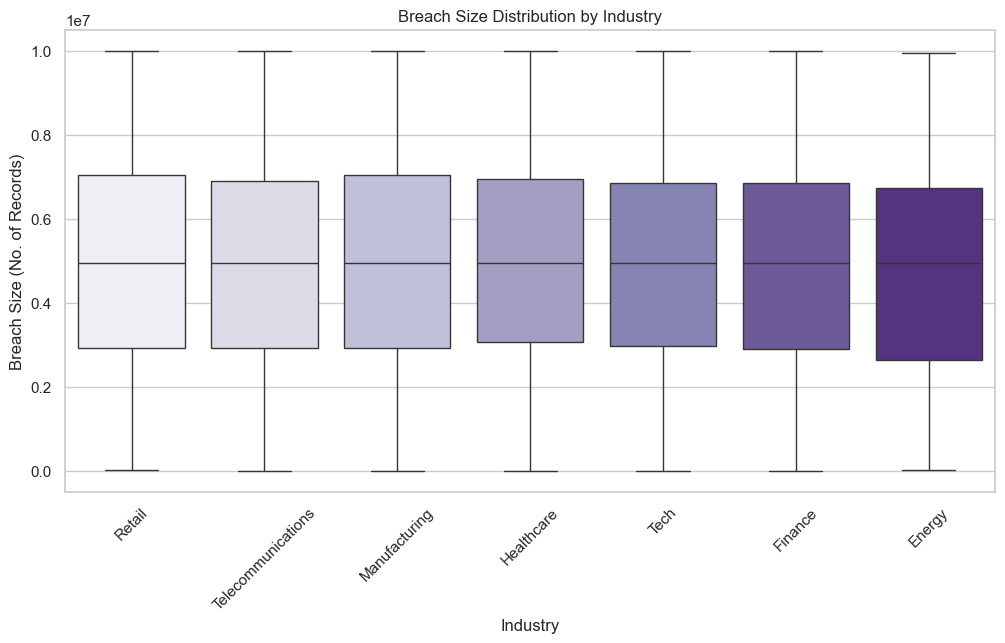

In [48]:
# Cell 8: Breach Size by Industry
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Breach_Size', data=data, palette='Purples')
plt.title("Breach Size Distribution by Industry")
plt.xlabel("Industry")
plt.ylabel("Breach Size (No. of Records)")
plt.xticks(rotation=45)
plt.show()


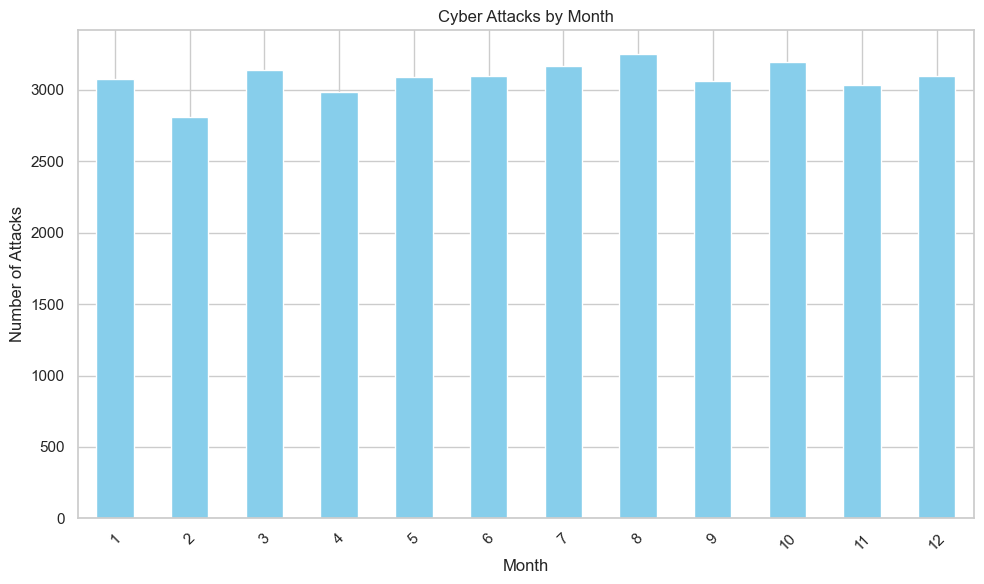

In [49]:
# Cell 1: Monthly Trends of Cyber Attacks
monthly_trends = data.groupby('Month').size()

plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='bar', color='skyblue')
plt.title('Cyber Attacks by Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

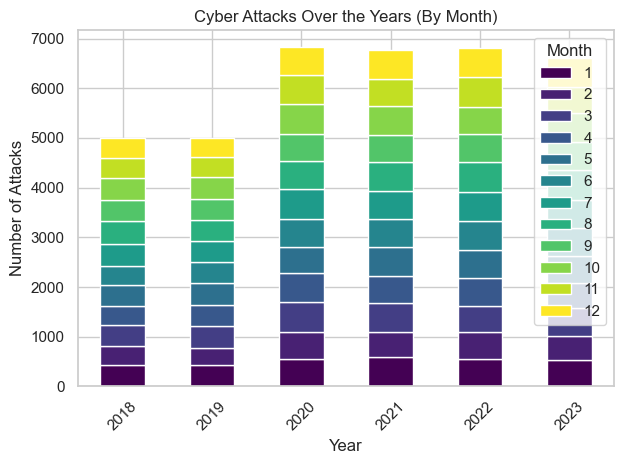

In [50]:
# Cell 2: Year-Month Trends of Cyber Attacks
year_month_trends = data.groupby(['Year', 'Month']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
year_month_trends.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Cyber Attacks Over the Years (By Month)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

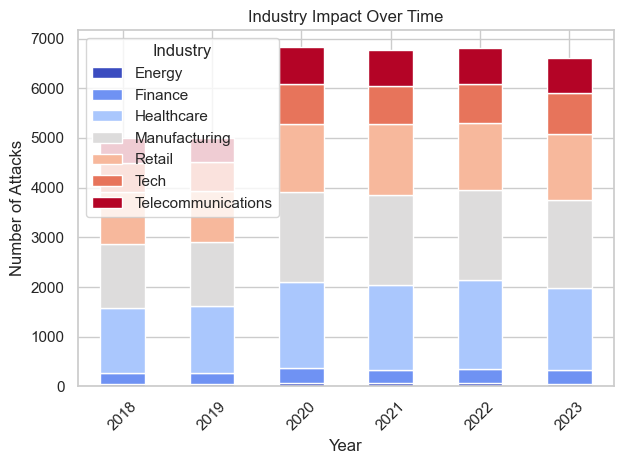

In [51]:
# Cell 3: Industry Impact Over Time
industry_trends = data.groupby(['Year', 'Industry']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
industry_trends.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Industry Impact Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


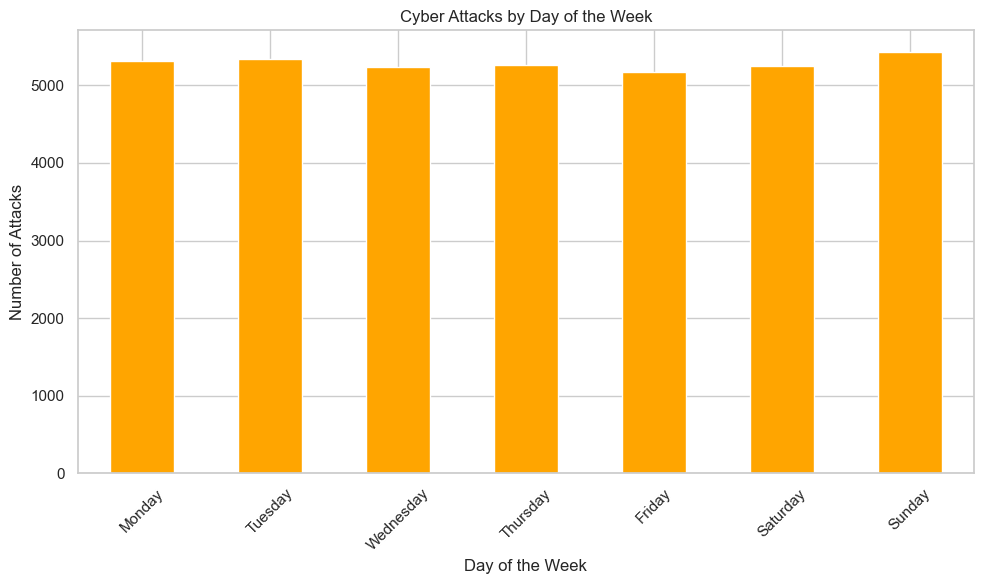

In [52]:
# Cell 4: Cyber Attacks by Day of the Week
data['Date_of_Incident'] = pd.to_datetime(data['Date_of_Incident'])
data['DayOfWeek'] = data['Date_of_Incident'].dt.day_name()

day_of_week_trends = data.groupby('DayOfWeek').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
day_of_week_trends.plot(kind='bar', color='orange')
plt.title('Cyber Attacks by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


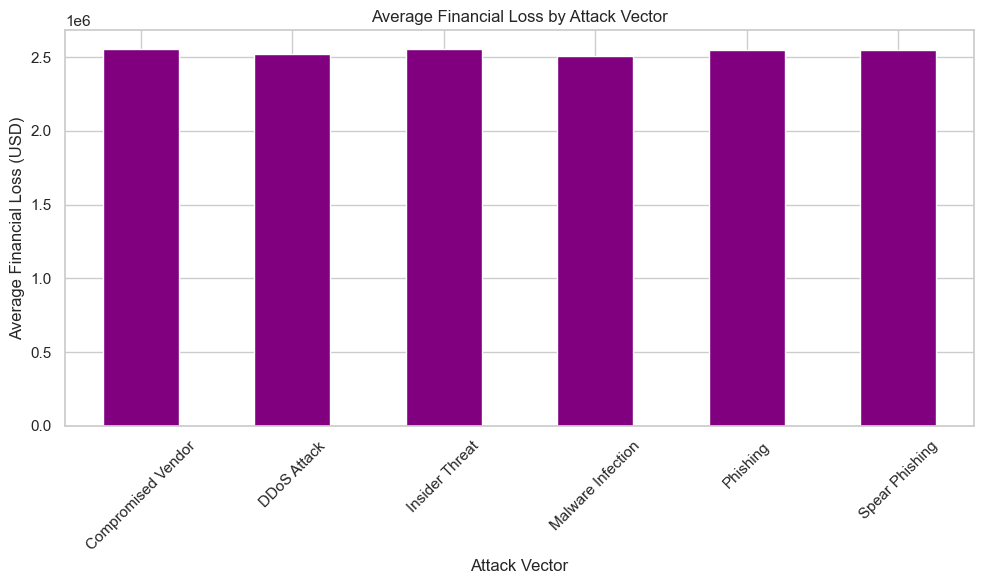

In [54]:
# Cell 6: Average Financial Loss by Attack Vector
attack_vector_financial_loss = data.groupby('Attack_Vector')['Financial_Loss'].mean()

plt.figure(figsize=(10, 6))
attack_vector_financial_loss.plot(kind='bar', color='purple')
plt.title('Average Financial Loss by Attack Vector')
plt.xlabel('Attack Vector')
plt.ylabel('Average Financial Loss (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\JasonGreich\AppData\Local\Temp\ipykernel_9868\3177690063.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_companies.index, x=top_companies.values, palette='coolwarm')


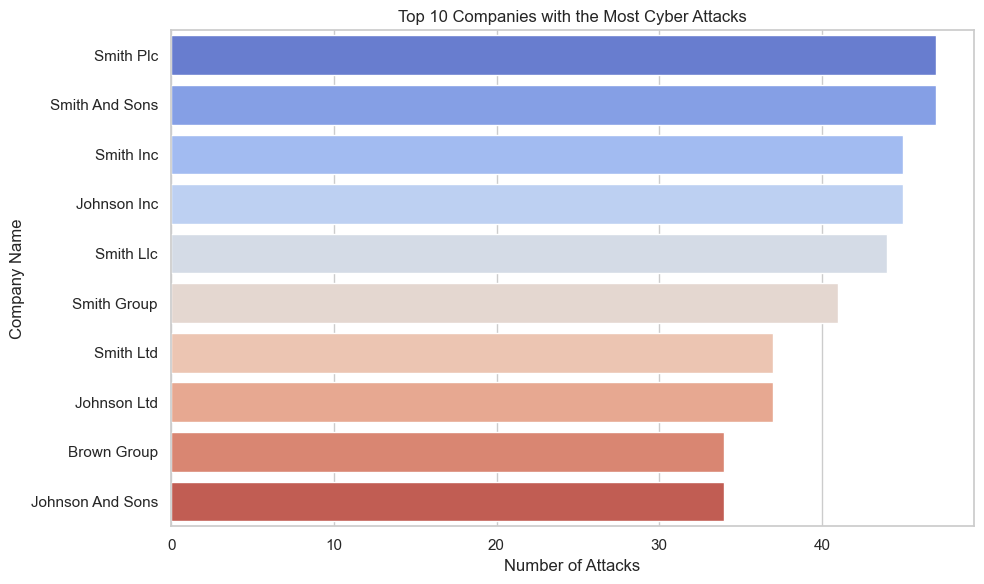

In [55]:
# Cell 1: Top 10 Companies with the Most Cyber Attacks
top_companies = data['Company_Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_companies.index, x=top_companies.values, palette='coolwarm')
plt.title('Top 10 Companies with the Most Cyber Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Company Name')
plt.tight_layout()
plt.show()


C:\Users\JasonGreich\AppData\Local\Temp\ipykernel_9868\322228811.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attacks_by_day_of_week.index, y=attacks_by_day_of_week.values, palette='Set2')


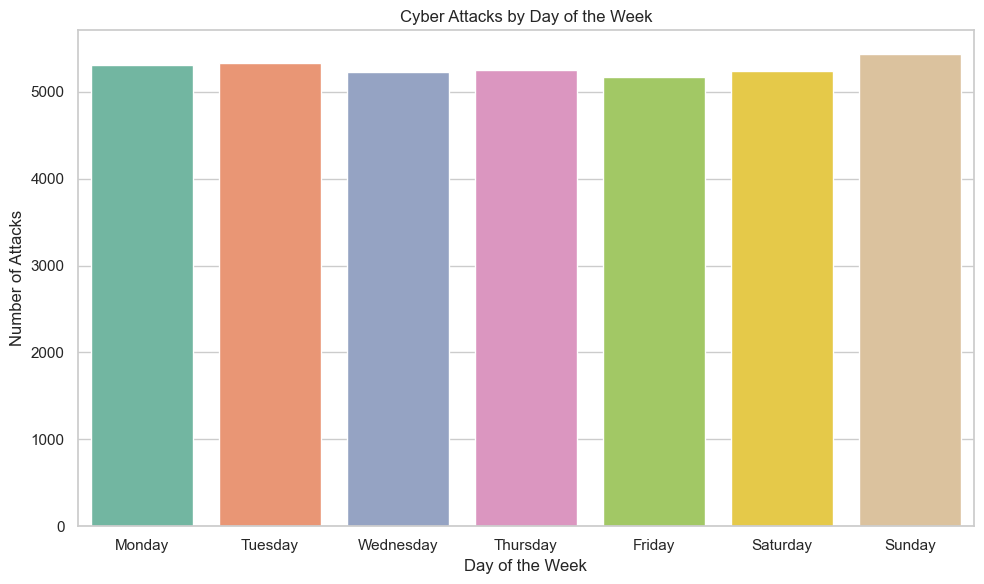

In [56]:
# Cell 2: Cyber Attacks by Day of the Week
attacks_by_day_of_week = data['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sns.barplot(x=attacks_by_day_of_week.index, y=attacks_by_day_of_week.values, palette='Set2')
plt.title('Cyber Attacks by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()


C:\Users\JasonGreich\AppData\Local\Temp\ipykernel_9868\2392410336.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Industry', y='Breach_Size', data=data, palette='Purples')


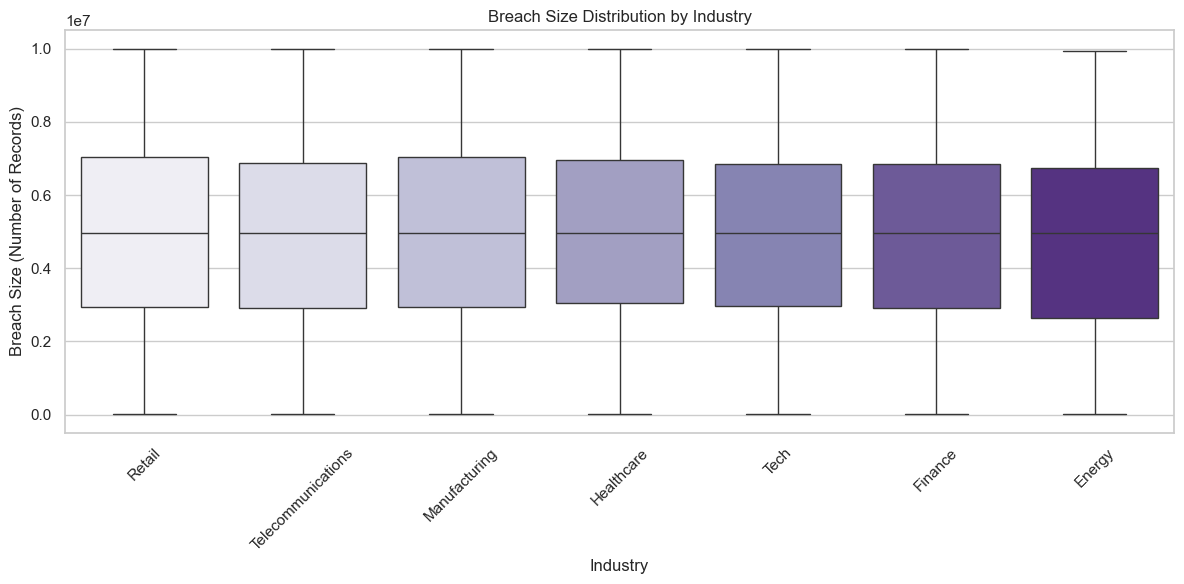

In [57]:
# Cell 3: Breach Size Distribution by Industry
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Breach_Size', data=data, palette='Purples')
plt.title("Breach Size Distribution by Industry")
plt.xlabel("Industry")
plt.ylabel("Breach Size (Number of Records)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\JasonGreich\AppData\Local\Temp\ipykernel_9868\1615750714.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Breach_Size', data=data, palette='Blues')


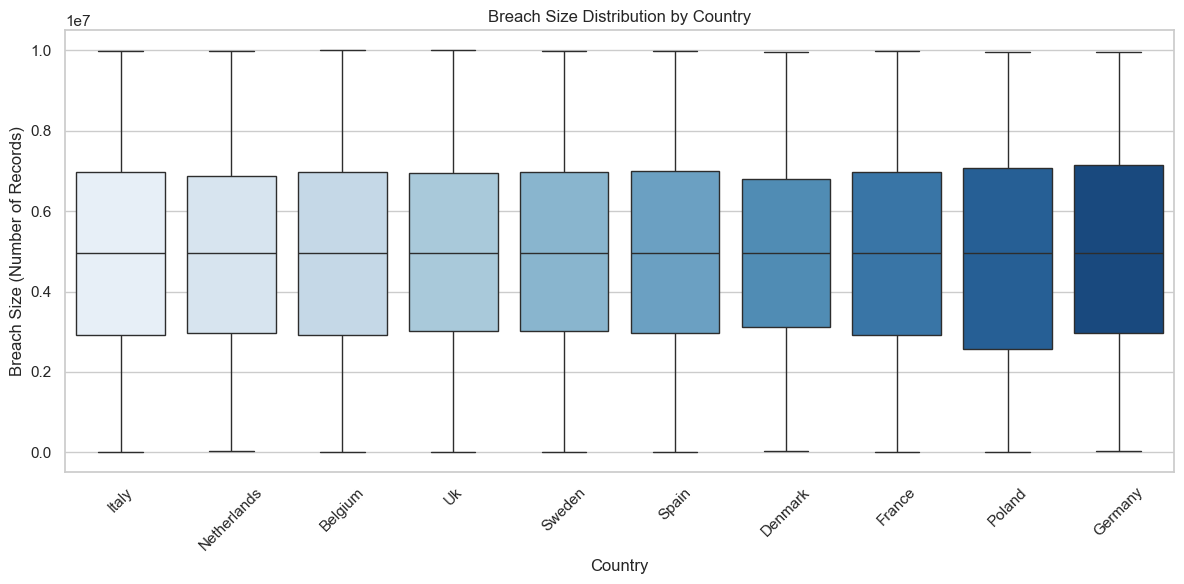

In [58]:
# Cell 4: Breach Size Distribution by Country
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Breach_Size', data=data, palette='Blues')
plt.title("Breach Size Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Breach Size (Number of Records)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [60]:


# Convert 'Date_of_Incident' to datetime if it exists, else extract date-related features
if 'Date_of_Incident' in data.columns:
    data['Date_of_Incident'] = pd.to_datetime(data['Date_of_Incident'])
    data['Year'] = data['Date_of_Incident'].dt.year
    data['Month'] = data['Date_of_Incident'].dt.month
    data['DayOfWeek'] = data['Date_of_Incident'].dt.day_name()


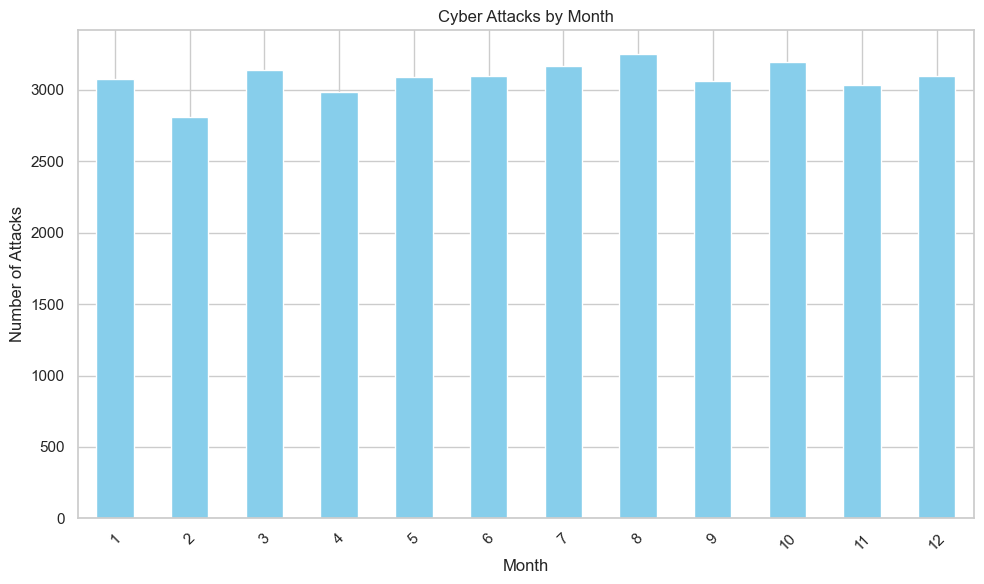

In [61]:
# Cell 2: Plot Monthly Trends of Cyber Attacks
monthly_trends = data.groupby('Month').size() if 'Month' in data.columns else None

# Plot Monthly Trends
if monthly_trends is not None:
    plt.figure(figsize=(10, 6))
    monthly_trends.plot(kind='bar', color='skyblue')
    plt.title('Cyber Attacks by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Attacks')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<Figure size 1000x600 with 0 Axes>

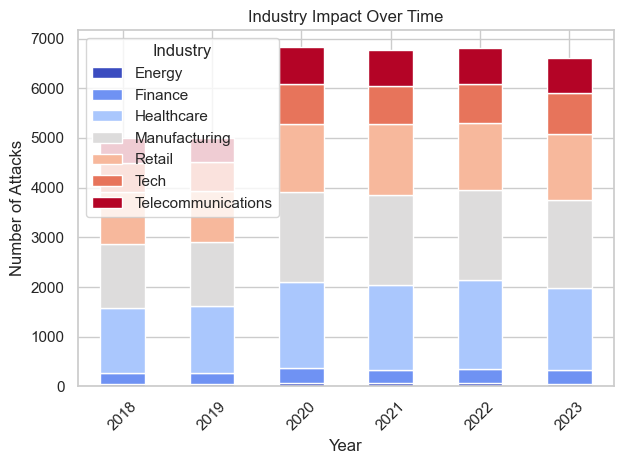

In [63]:
# Cell 4: Industry Impact Over Time
industry_trends = data.groupby(['Year', 'Industry']).size().unstack(fill_value=0) if 'Year' in data.columns and 'Industry' in data.columns else None

# Plot Industry Trends
if industry_trends is not None:
    plt.figure(figsize=(10, 6))
    industry_trends.plot(kind='bar', stacked=True, colormap='coolwarm')
    plt.title('Industry Impact Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Attacks')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


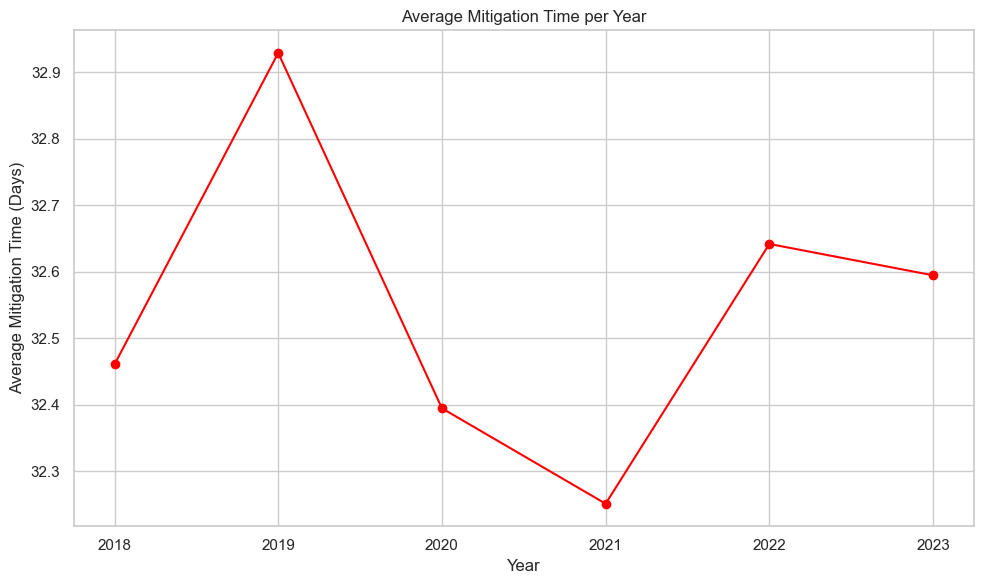

In [65]:
# Cell 1: Average Mitigation Time per Year
mitigation_time_per_year = data.groupby('Year')['Mitigation_Time'].mean()

plt.figure(figsize=(10, 6))
mitigation_time_per_year.plot(kind='line', marker='o', color='red')
plt.title('Average Mitigation Time per Year')
plt.xlabel('Year')
plt.ylabel('Average Mitigation Time (Days)')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

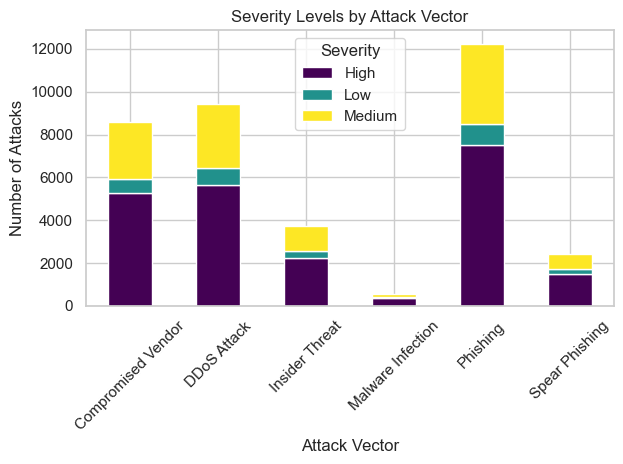

In [66]:
# Cell 2: Severity Levels by Attack Vector
data['Severity'] = data.apply(lambda row: 'Low' if row['Financial_Loss'] < 500000 
                              else 'Medium' if 500000 <= row['Financial_Loss'] < 2000000 
                              else 'High', axis=1)
severity_by_attack_vector = data.groupby(['Attack_Vector', 'Severity']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
severity_by_attack_vector.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Severity Levels by Attack Vector')
plt.xlabel('Attack Vector')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

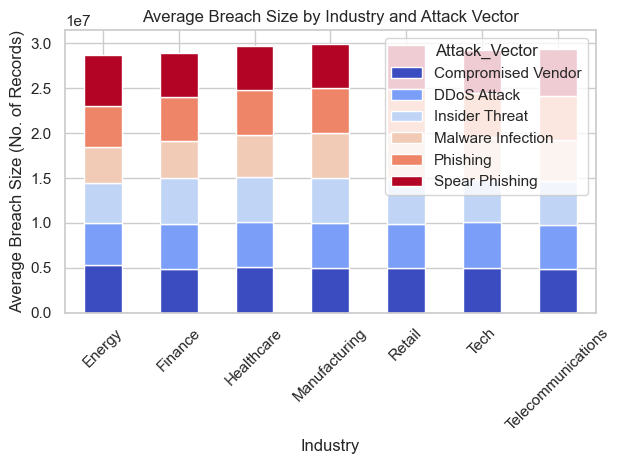

In [67]:
# Cell 3: Average Breach Size by Industry and Attack Vector
industry_attack_breach = data.groupby(['Industry', 'Attack_Vector'])['Breach_Size'].mean().unstack().fillna(0)

plt.figure(figsize=(12, 8))
industry_attack_breach.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Average Breach Size by Industry and Attack Vector')
plt.xlabel('Industry')
plt.ylabel('Average Breach Size (No. of Records)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
